In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Ambiente pronto!")
print("Versão do Pandas:", pd.__version__)


Ambiente pronto!
Versão do Pandas: 2.3.3


In [2]:
path = "../data/olist-dataset/"

orders = pd.read_csv(path + "olist_orders_dataset.csv")
customers = pd.read_csv(path + "olist_customers_dataset.csv")
items = pd.read_csv(path + "olist_order_items_dataset.csv")
payments = pd.read_csv(path + "olist_order_payments_dataset.csv")
products = pd.read_csv(path + "olist_products_dataset.csv")
sellers = pd.read_csv(path + "olist_sellers_dataset.csv")
reviews = pd.read_csv(path + "olist_order_reviews_dataset.csv")

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
df = (
    orders
    .merge(payments, on="order_id", how="left")
    .merge(items, on="order_id", how="left")
    .merge(customers, on="customer_id", how="left")
)

df.shape, df.head()


((118434, 22),
                            order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 
   order_status order_purchase_timestamp    order_approved_at  \
 0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
 1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
 2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
 3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
 4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
 
   order_delivered_carrier_date order_delivered_customer_date  \
 0          2017-10-04 19:55:00           2017-10-10 21:25:13   
 1          2017-

In [4]:
df[['order_id', 'customer_unique_id', 'payment_type', 'price', 'freight_value']].head(10)


,order_id,customer_unique_id,payment_type,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,credit_card,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,voucher,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,voucher,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,boleto,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,credit_card,159.90,19.22
5,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,credit_card,45.00,27.20
6,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,credit_card,19.90,8.72
7,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,credit_card,147.90,27.36
8,136cce7faa42fdb2cefd53fdc79a6098,36edbb3fb164b1f16485364b6fb04c73,credit_card,49.90,16.05
9,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,credit_card,59.99,15.17


In [5]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       118434 non-null  datetime64[ns]
 1   order_approved_at              118258 non-null  datetime64[ns]
 2   order_delivered_customer_date  115037 non-null  datetime64[ns]
 3   order_estimated_delivery_date  118434 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 3.6 MB


In [6]:
df["delivery_time_days"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.days

df["delivery_time_days"].describe()


count    115037.000000
mean         12.019237
std           9.461440
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: delivery_time_days, dtype: float64

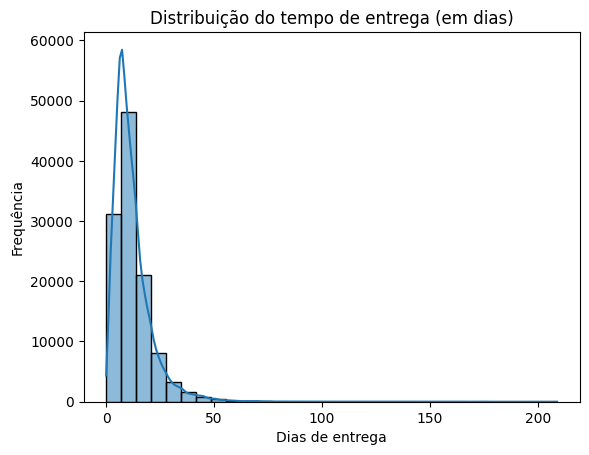

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["delivery_time_days"], bins=30, kde=True)
plt.title("Distribuição do tempo de entrega (em dias)")
plt.xlabel("Dias de entrega")
plt.ylabel("Frequência")
plt.show()

In [8]:
df['is_late'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

In [9]:
df.isna().mean().sort_values(ascending=False).head(10)

order_delivered_customer_date    0.028683
delivery_time_days               0.028683
order_delivered_carrier_date     0.017512
freight_value                    0.007008
seller_id                        0.007008
product_id                       0.007008
shipping_limit_date              0.007008
price                            0.007008
order_item_id                    0.007008
order_approved_at                0.001486
dtype: float64

In [10]:
df = df.dropna(subset=["order_delivered_customer_date"])

In [11]:
df["delivery_lead_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["delivery_delay"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days
df["is_late"] = (df["delivery_delay"] > 0).astype(int)

df["total_value"] = df["price"] + df["freight_value"]
df["freight_share"] = df["freight_value"] / df["total_value"]


In [12]:
df[["total_value", "price", "freight_value", "delivery_lead_time"]].describe()

,total_value,price,freight_value,delivery_lead_time
count,115037.000000,115037.000000,115037.000000,115037.000000
mean,140.072604,120.077546,19.995058,12.019237
std,190.088880,183.027805,15.743533,9.461440
min,6.080000,0.850000,0.000000,0.000000
25%,55.230000,39.900000,13.080000,6.000000
50%,91.860000,74.900000,16.280000,10.000000
75%,157.300000,133.000000,21.180000,15.000000
max,6929.310000,6735.000000,409.680000,209.000000


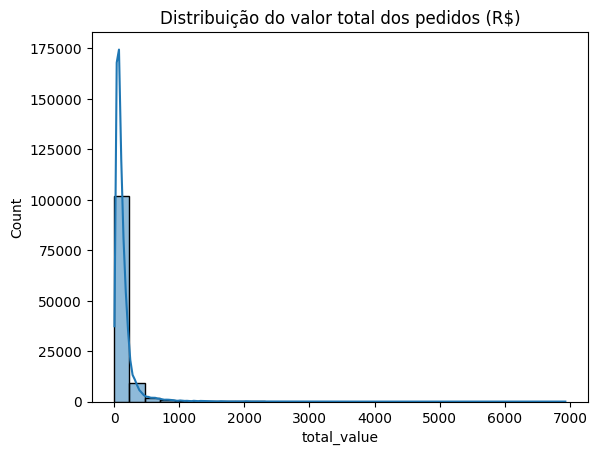

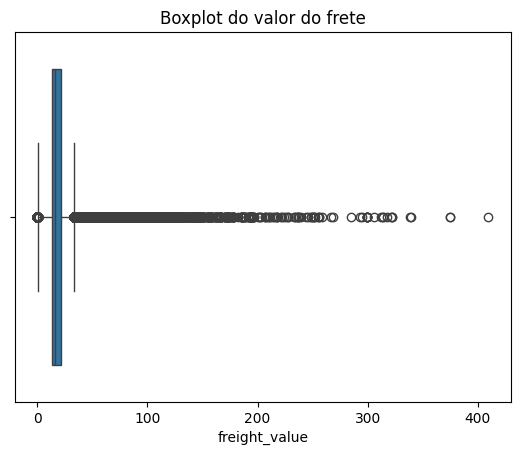

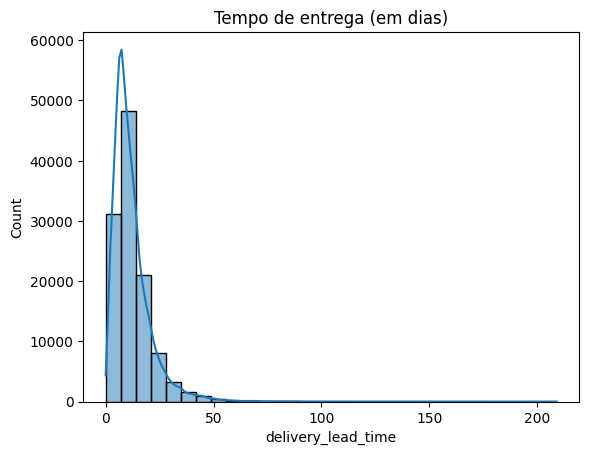

In [13]:
sns.histplot(df["total_value"], bins=30, kde=True)
plt.title("Distribuição do valor total dos pedidos (R$)")
plt.show()

sns.boxplot(x=df["freight_value"])
plt.title("Boxplot do valor do frete")
plt.show()

sns.histplot(df["delivery_lead_time"], bins=30, kde=True)
plt.title("Tempo de entrega (em dias)")
plt.show()

In [14]:
kpis = {
    "Ticket médio (R$)": df["total_value"].mean(),
    "Frete médio (R$)": df["freight_value"].mean(),
    "Prazo médio de entrega (dias)": df["delivery_lead_time"].mean(),
    "Taxa de atraso (%)": df["is_late"].mean() * 100,
    "Pedidos totais": df["order_id"].nunique()
}

pd.DataFrame(kpis, index=["Indicadores"])

,Ticket médio (R$),Frete médio (R$),Prazo médio de entrega (dias),Taxa de atraso (%),Pedidos totais
Indicadores,140.072604,19.995058,12.019237,6.54572,96476


In [15]:
from scipy import stats
import numpy as np

sample = df["total_value"].dropna()
mean = sample.mean()
std = sample.std(ddof=1)
n = len(sample)
ic = stats.t.interval(0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))

print(f"Ticket médio: R${mean:.2f}")
print(f"IC 95%: ({ic[0]:.2f}, {ic[1]:.2f})")


Ticket médio: R$140.07
IC 95%: (138.97, 141.17)


In [16]:
kpi_cat = (
    df.groupby("product_id")
      .agg(ticket_medio=("total_value", "mean"),
           frete_medio=("freight_value", "mean"),
           atraso_medio=("is_late", "mean"))
      .sort_values("ticket_medio", ascending=False)
)
kpi_cat.head(10)


,ticket_medio,frete_medio,atraso_medio
product_id,,,
489ae2aa008f021502940f251d4cce7f,6929.31,194.31,0.0
69c590f7ffc7bf8db97190b6cb6ed62e,6922.21,193.21,1.0
1bdf5e6731585cf01aa8169c7028d6ad,6726.66,227.66,0.0
a6492cc69376c469ab6f61d8f44de961,4950.34,151.34,0.0
c3ed642d592594bb648ff4a04cee2747,4764.34,74.34,0.0
259037a6a41845e455183f89c5035f18,4681.78,91.78,0.0
a1beef8f3992dbd4cd8726796aa69c53,4513.32,113.45,0.0
4ca7b91a31637bd24fb8e559d5e015e4,4194.76,195.76,0.0
6cdf8fc1d741c76586d8b6b15e9eef30,4175.26,75.27,0.0


In [17]:
kpi_regiao = (
    df.groupby("customer_state")
      .agg(ticket_medio=("total_value", "mean"),
           frete_medio=("freight_value", "mean"),
           atraso_medio=("is_late", "mean"))
      .sort_values("ticket_medio", ascending=False)
)
kpi_regiao.head(10)


,ticket_medio,frete_medio,atraso_medio
customer_state,,,
PB,237.911396,43.617528,0.110754
AC,220.926915,39.996489,0.031915
AL,220.911791,35.761519,0.213152
RO,206.724128,41.221815,0.039146
TO,204.657066,39.888563,0.089820
RN,202.225544,35.335651,0.103387
PI,201.780362,39.231302,0.139241
PA,200.610450,35.536450,0.111927
AP,197.546988,34.236024,0.036145
